In [22]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#read in csv files
df_W = pd.read_csv("final_weather.csv")
df_311 = pd.read_csv("final_311.csv")

#Fix Column names to do an inner join
df_311.rename(columns={"Date" : "date"}, inplace = True)
df_311.rename(columns={"Zip Codes" : "Zip_Codes"}, inplace = True)

#Combine files using pandas merge:
df = pd.merge(df_W, df_311, on = "date", how = "inner")
print(df.columns)

#Clean data for X variable for LR model
df_X = df[["Unique Key", "date", "Zipcodes", "average temperature", "precipitation", "snow fall", "snow depth"]].replace('T', 0.00)
df_X[["average temperature", "precipitation", "snow fall", "snow depth"]] = df_X[["average temperature", "precipitation", "snow fall", "snow depth"]].astype(float)


df_311 = df_311.sort_values(by=["date"])
df_311

Index(['Unnamed: 0_x', 'date', 'maximum temperature', 'minimum temperature',
       'average temperature', 'precipitation', 'snow fall', 'snow depth',
       'Unnamed: 0_y', 'Unique Key', 'Complaint Type', 'Descriptor',
       'Location Type', 'Zipcodes', 'Time'],
      dtype='object')


,Unnamed: 0,Unique Key,Complaint Type,Descriptor,Location Type,Zipcodes,date,Time
13841,527954,32310860,Rodent,Rat Sighting,3+ Family Apt. Building,10099.0,2016-01-01,00:00:00
13820,527008,32313802,Noise - Residential,Banging/Pounding,Residential Building/House,10099.0,2016-01-01,23:40:58
13821,527103,32317154,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10092.0,2016-01-01,21:24:50
13822,527105,32319722,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10092.0,2016-01-01,21:20:37
13823,527113,32319591,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10092.0,2016-01-01,21:16:24
...,...,...,...,...,...,...,...,...
22,874,35135231,Noise - Commercial,Banging/Pounding,Store/Commercial,10099.0,2016-12-31,01:40:17
23,888,35133695,Noise - Residential,Banging/Pounding,Residential Building/House,10092.0,2016-12-31,01:26:17
25,959,35137621,Rodent,Rat Sighting,3+ Family Apt. Building,10099.0,2016-12-31,00:00:00
13,529,35138100,Dirty Conditions,E12 Illegal Dumping Surveillance,Sidewalk,10099.0,2016-12-31,12:56:00


In [27]:
#Get the count of the number of 311 calls per day.
count_311 = df.groupby("date", as_index = False)["Unique Key"].count()

#Make sure rows match
mean_weather = df_X.groupby("date", as_index=False)[["Zipcodes", "average temperature", "precipitation", "snow fall", "snow depth"]].mean()
#print(mean_weather)

#Linear Regression Model Set Up

#This is to clean the data before running the LR Model. It shortens X to have the same number of rows as Y.
X = mean_weather[["average temperature", "precipitation", "snow fall", "snow depth"]]
Y = count_311["Unique Key"]

# Split train and test data
X_train, X_Test, y_train, y_test = df_linearRegression = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

dependentVar = model.predict(X)
#print(dependentVar)

Index(['date', 'Zipcodes', 'average temperature', 'precipitation', 'snow fall',
       'snow depth', 'Unique Key'],
      dtype='object')


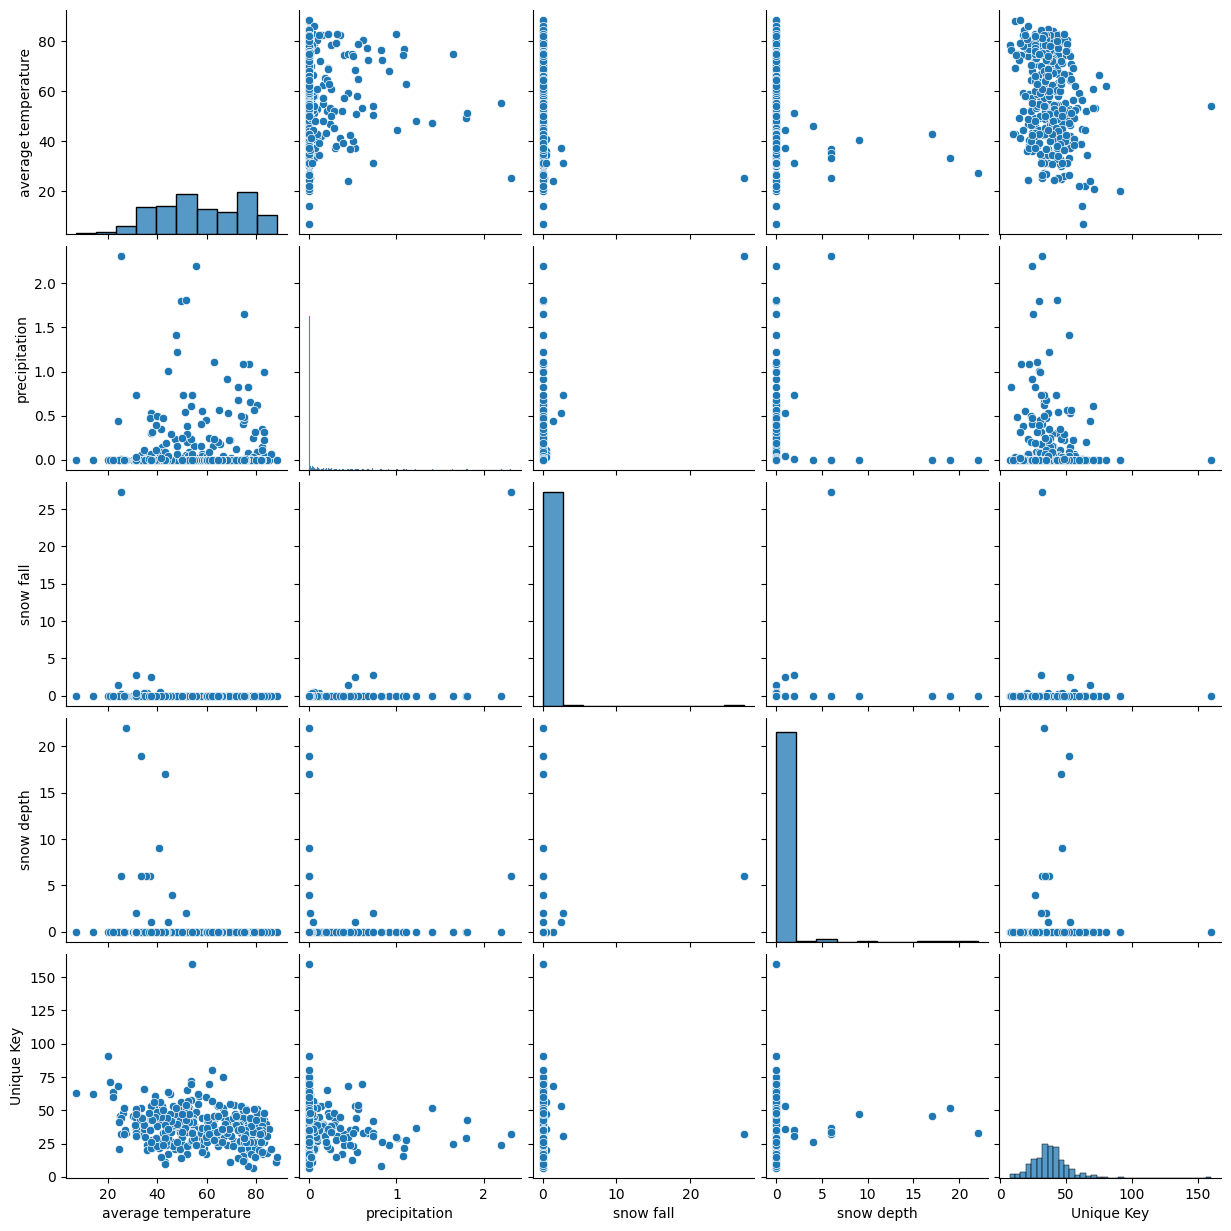

In [29]:
#Compare Coefficients
#this is test
df_pair = pd.merge(mean_weather, count_311[['date', 'Unique Key']], on='date', how='inner')
print(df_pair.columns)
sns.pairplot(df_pair.drop(columns=["Zipcodes"]))

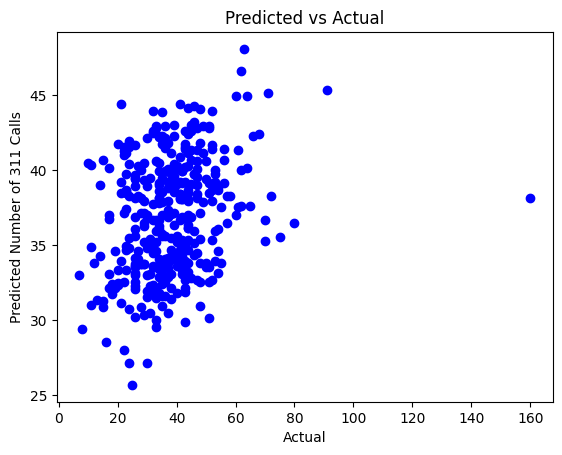

In [30]:
#Visual of Predicted vs actual values
plt.scatter(Y, dependentVar, color = "blue")

plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted Number of 311 Calls")

#plt.legend()
plt.show()

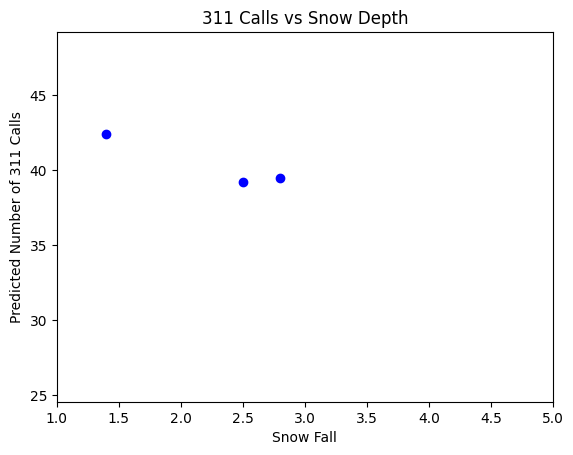

In [31]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["snow fall"], dependentVar, color = "blue")
plt.xlim(1, 5)
plt.title("311 Calls vs Snow Depth")
plt.xlabel("Snow Fall")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

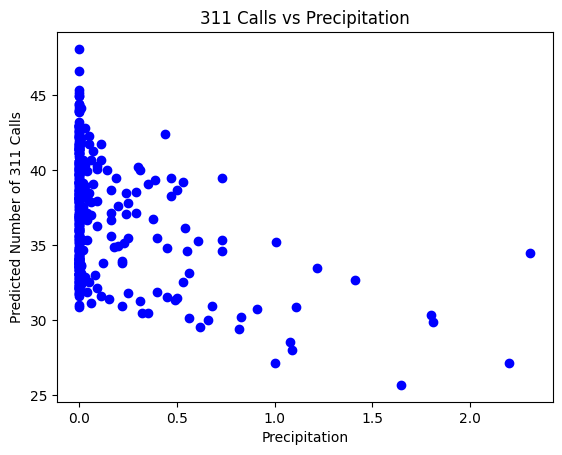

In [32]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["precipitation"], dependentVar, color = "blue")
#plt.xlim(1, 30)
plt.title("311 Calls vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

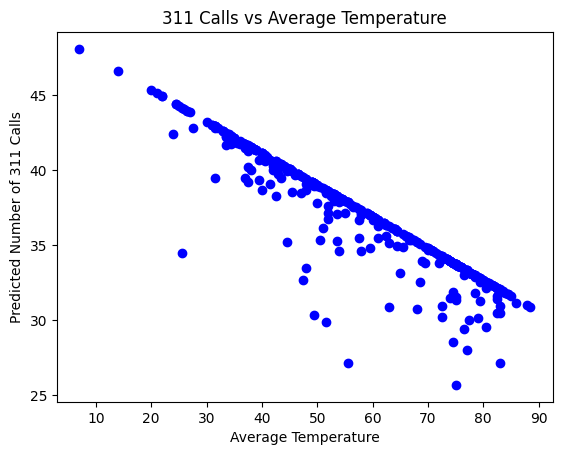

In [33]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["average temperature"], dependentVar, color = "blue")

plt.title("311 Calls vs Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

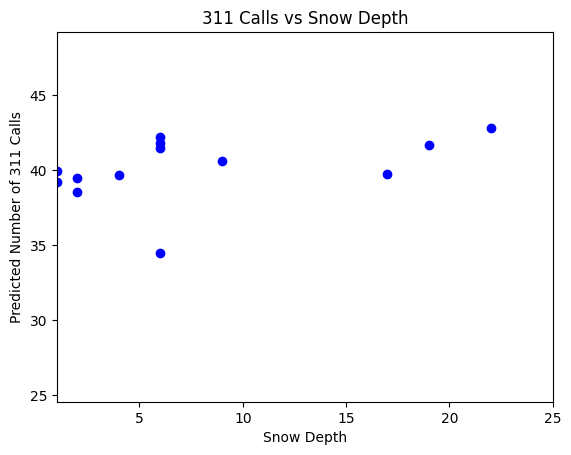

In [34]:
#Visual of snow fall vs actual values
plt.scatter(mean_weather["snow depth"], dependentVar, color = "blue")
plt.xlim(1, 25)
plt.title("311 Calls vs Snow Depth")
plt.xlabel("Snow Depth")
plt.ylabel("Predicted Number of 311 Calls")
#plt.legend()
plt.show()

In [35]:
#From: https://data.ny.gov/Government-Finance/New-York-State-ZIP-Codes-County-FIPS-Cross-Referen/juva-r6g2 
df_NY_County = pd.read_csv("final_NYZipCode.csv")

In [42]:
#honestly i dont think we need this. but county_df is empty at the end of this cell.


#Makes dictionary of corresponding zip codes for every county in NY
county = {}
for c, z in zip(df_NY_County["County Name"], df_NY_County["ZIP Code"]):
    if c not in county:
        county[c] = []
    if c in county:
       county[c].append(z)
#print(county)

#Inverts to make the zip codes the key 
inverted_county = {}
for key, values in county.items():
    for value in values:
        if value not in inverted_county:
            inverted_county[value] = key
#print(inverted_county)

def ZipCodeToCounty(zipcode):
    if int(zipcode) in inverted_county:
        return inverted_county[int(zipcode)]
    else:
        return None
#Adds county to the data frame with 
County_df = df_X.dropna()
Counties = County_df["Zipcodes"].apply(ZipCodeToCounty)
County_df["Counties"] = Counties.to_list()
County_df = County_df.dropna()

#Counts number of calls per county
County_df.groupby("Counties").count()["date"].sort_values(ascending = False)

County_df

{12007: 'Albany', 12009: 'Albany', 12023: 'Albany', 12041: 'Albany', 12045: 'Albany', 12046: 'Albany', 12047: 'Albany', 12053: 'Albany', 12054: 'Albany', 12055: 'Albany', 12059: 'Albany', 12067: 'Albany', 12077: 'Albany', 12083: 'Albany', 12084: 'Albany', 12085: 'Albany', 12087: 'Albany', 12107: 'Albany', 12110: 'Albany', 12120: 'Albany', 12122: 'Albany', 12128: 'Albany', 12143: 'Albany', 12147: 'Albany', 12157: 'Albany', 12158: 'Albany', 12159: 'Albany', 12161: 'Albany', 12183: 'Albany', 12186: 'Albany', 12189: 'Albany', 12193: 'Albany', 12201: 'Albany', 12202: 'Albany', 12203: 'Albany', 12204: 'Albany', 12205: 'Albany', 12206: 'Albany', 12207: 'Albany', 12208: 'Albany', 12209: 'Albany', 12210: 'Albany', 12211: 'Albany', 12212: 'Albany', 12220: 'Albany', 12222: 'Albany', 12223: 'Albany', 12224: 'Albany', 12226: 'Albany', 12227: 'Albany', 12228: 'Albany', 12229: 'Albany', 12230: 'Albany', 12231: 'Albany', 12232: 'Albany', 12233: 'Albany', 12234: 'Albany', 12235: 'Albany', 12236: 'Alban

,Unique Key,date,Zipcodes,average temperature,precipitation,snow fall,snow depth,Counties


In [12]:
#Greene County had the most number of 311 Calls